# NewSegmentation Evaluation por Peer-review of the paper.

The experiment consists in the evaluation of the ``NewSegmentation`` algorithm proposed on this package, which is a new algorithm for the segmentation of the news in spanish newscast. The algorithm is based on the paper.

### Imports

We need to import the following libraries:

* ``numpy``: for the manipulation of the data.
* ``newsegmentation``: for the implementation of the algorithm.
* ``pandas``: for the manipulation of the data.
* ``matplotlib``: for the visualization of the data.
* ``time``: for the evaluation of the performance in the experiments.

In [3]:
import numpy as np
import newsegmentation as ns
import os
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import display, Latex

### Data

The data used for the evaluation is the ``newscast`` dataset, which is a dataset of spanish newscast. The dataset is composed by several files modelling a database in terms of the following information:

* ``p_d``: Temporal jump detection probability. It is a probability of the temporal jump detection in the preprocess module.
* ``p_fa``: Fake temporal jump detection probability. It is a probability of the false temporal jump detection in the preprocess module.
* ``max_length``: Maximum length of the sentences in one newscast. It is the maximum length of the news in the preprocess module. Fixed to a uniform distribution between 10 and 14.
* ``number_of_articles``: Number of articles to extract from Wikipedia. It is the number of articles to extract from Wikipedia in the preprocess module. Fixed to a uniform distribution between 4 and 9.

All the databases extract information from Wikipedia, and the information is the following:

* ``data``: The data of the newscast, split in sentences, one per line, with the '$' symbol at the end of each sentence if a temporal jump is modelled.
* ``ground-truth``: The ground-truth of the newscast, split in sentences, one per line, and mixed in blocks. A block is defined by a line with the format ``% [x]`` where x is the identifier of the block.

To import the databases you can import the following classes and functions:

* ``WikipediaReader``: Class to read the Wikipedia database.
* ``validation``: Function to start the experiments.

The module was written with the aid of ``Copilot``.

In [3]:
# Class constructor definition in wkreader.py file.
class WikipediaReader:
    def __init__(self, number_of_articles: int = 1, p: tuple[float, float] = (.8, 0.05), max_block_len: int = 12):
        """
        This class reads a random article from Wikipedia. The article is stored in the ``self.article`` attribute, and it
        is parsed by the class automatically.
        :param number_of_articles: The number of articles to read. [articles]
        :param p: The probability of detection and false detection of the temporal jumps. [non-dimensional]
        :param max_block_len: The maximum length of the temporal jump. [sentences]
        """
        self.number_of_articles = number_of_articles
        self.p = p
        self.max_block_len = max_block_len
        ...

In [4]:
from wkreader import WikipediaReader

def validation(init_path: str = '.\\d80_05\\', from_which: int = 0, number_of_files: int = 10) -> np.ndarray:
    """
    This function evaluates the performance of the algorithm in the newscast dataset.
    :param init_path: Path to the folder where the data is saved.
    :param from_which: Index of the first file to evaluate.
    :param number_of_files: Number of files to evaluate.
    :return:
    """
    gt_paths = [f'{init_path}\\ground_truth\\{one}' for one in os.listdir(f'{init_path}\\ground_truth')]
    data_paths = [f'{init_path}\\data\\{one}' for one in os.listdir(f'{init_path}\\data')]
    evaluation = list()
    times = list()
    for gt, data in zip(gt_paths[from_which:from_which + number_of_files], data_paths[from_which:from_which + number_of_files]):
        tik = time.time()
        try:
            mns = ns.Segmentation(data)
            eva = mns.evaluate(gt)
            evaluation.append(eva)
            tok = time.time()
            mean_times = np.mean(times) if times else 999.
            print(eva, f'Elapsed time: {tok - tik:.2f} seconds.', f'Average time: {mean_times:.2f} seconds.')
            times.append(tok - tik)
        except Exception as e:
            print(f'An exception occurred while evaluating, skipping case: {e}')

    print(f'Average time: {np.mean(times):.2f} seconds.')

    # Extract the items from each element in the evaluation list and build a numpy array with its values.
    # The array will have the shape (n, 4), where n is the number of files evaluated.
    # The columns will be: precision, recall, f1-score and Pk-score.
    results = np.array([list(one.values()) for one in evaluation])
    # Append the mean of each column to the results array.
    results = np.append(results, [np.mean(results, axis=0)], axis=0)
    print(results)
    # Save the results in ./results/<from>_<to>.npy
    np.save(f'{init_path}\\results\\{from_which}_{from_which + number_of_files}.npy', results)
    return results

def read_wikipedia(number_of_trials: int = 10, probabilities: tuple = (.8, .05), __init_path__: str = '.\\d80_05\\') -> None:
    """
    This function is the main function of the program. And implements the utility of the WikipediaReader class.
    :param number_of_trials: Number of trials to perform.
    :param probabilities: Probabilities of the temporal jump detection and the false temporal jump detection.
    :param __init_path__: Path to the folder where the data will be saved.
    :return: Nothing
    """
    if not os.path.exists(__init_path__):
        os.mkdir(__init_path__)
    if not os.path.exists(f'{__init_path__}\\data'):
        os.mkdir(f'{__init_path__}\\data')
    if not os.path.exists(f'{__init_path__}\\ground_truth'):
        os.mkdir(f'{__init_path__}\\ground_truth')
    __init_path_len__ = os.listdir(f'{__init_path__}\\data').__len__()

    successful_index = __init_path_len__
    while successful_index < number_of_trials:
        noa = np.random.randint(4, 9)
        max_len = np.random.randint(10, 14)
        wiki_reader = WikipediaReader(noa, probabilities, max_len)
        if wiki_reader.success:
            wiki_reader.save(path=__init_path__, index=successful_index)
            successful_index += 1

Now we run the function ``read_wikipedia`` to get the data.

In [5]:
database_path = '.\\d80_05\\'
read_wikipedia(200, (.8, .05), database_path)

### Experiments

Now we will test the database with the algorithm. We will use the function ``validation`` to evaluate the performance of the algorithm in the newscast dataset.

In [6]:
database_path = '.\\d80_05\\'
validation(init_path=database_path, from_which=0, number_of_files=10)

{'Precision': 0.9099929128277817, 'Recall': 0.9099929128277817, 'F1': 0.9099929128277817, 'WD': 0.23076923076923078, 'Pk': 0.15384615384615385} Elapsed time: 31.89 seconds. Average time: 999.00 seconds.
{'Precision': 0.945635528330781, 'Recall': 0.9618380062305296, 'F1': 0.9536679536679536, 'WD': 0.05084745762711865, 'Pk': 0.05084745762711865} Elapsed time: 25.41 seconds. Average time: 31.89 seconds.
{'Precision': 0.9424870466321243, 'Recall': 0.9848402815376286, 'F1': 0.9631983055334922, 'WD': 0.2112676056338028, 'Pk': 0.14084507042253522} Elapsed time: 29.86 seconds. Average time: 28.65 seconds.
{'Precision': 0.9628893306825712, 'Recall': 0.9622516556291391, 'F1': 0.9625703875455448, 'WD': 0.10909090909090909, 'Pk': 0.07272727272727272} Elapsed time: 28.40 seconds. Average time: 29.05 seconds.
{'Precision': 0.8434296365330848, 'Recall': 1.0, 'F1': 0.9150657229524771, 'WD': 0.08888888888888889, 'Pk': 0.08888888888888889} Elapsed time: 17.44 seconds. Average time: 28.89 seconds.
{'Prec

array([[0.90999291, 0.90999291, 0.90999291, 0.23076923, 0.15384615],
       [0.94563553, 0.96183801, 0.95366795, 0.05084746, 0.05084746],
       [0.94248705, 0.98484028, 0.96319831, 0.21126761, 0.14084507],
       [0.96288933, 0.96225166, 0.96257039, 0.10909091, 0.07272727],
       [0.84342964, 1.        , 0.91506572, 0.08888889, 0.08888889],
       [0.95631068, 0.95169082, 0.95399516, 0.22222222, 0.16666667],
       [0.8       , 0.93233083, 0.86111111, 0.33333333, 0.33333333],
       [0.96241458, 0.99881797, 0.98027842, 0.04819277, 0.02409639],
       [0.6064333 , 0.95245171, 0.74104046, 0.54285714, 0.54285714],
       [0.86800182, 0.81565441, 0.84101433, 0.21978022, 0.14285714],
       [0.87975948, 0.94698686, 0.90819348, 0.20572498, 0.17169655]])

### Repeat experiments with different probabilities.

Now we can repeat the experiments with different probabilities. We will use the function ``read_wikipedia`` to get the data and the function ``validation`` to evaluate the performance of the algorithm in the newscast dataset. We will use the following probabilities:

* ``p = ([0.0 - 0.8], [0.00 - 0.25])``

Where p[0] is the probability of the temporal jump detection and p[1] is the probability of the false temporal jump detection.
Note that values of ``p_fa`` over 0.25 are not recommended because it does not model the behavior of the News properly, it is so also for ``p_d`` for values over 0.8.

The variables ``result_split`` and ``shard_len`` are used to split the results in different files. The results are saved in the folder ``results`` in the database folder. The results are saved in the format ``<from>_<to>.npy``. Where ``<from>`` is the index of the first file evaluated and ``<to>`` is the index of the last file evaluated. The ``shard_len`` method tells the reader the lenght of the database in each file.

In [7]:
probs = [ (0.8, 0.00),  (0.70, 0.00), (0.60, 0.00), (0.50, 0.00), (0.40, 0.00), (0.30, 0.00), (0.20, 0.00), (0.10, 0.00), (0.00, 0.00),
          (0.8, 0.05),  (0.70, 0.05), (0.60, 0.05), (0.50, 0.05), (0.40, 0.05), (0.30, 0.05), (0.20, 0.05), (0.10, 0.05), (0.00, 0.05),
          (0.8, 0.10),  (0.70, 0.10), (0.60, 0.10), (0.50, 0.10), (0.40, 0.10), (0.30, 0.10), (0.20, 0.10), (0.10, 0.10), (0.00, 0.10),
          (0.8, 0.15),  (0.70, 0.15), (0.60, 0.15), (0.50, 0.15), (0.40, 0.15), (0.30, 0.15), (0.20, 0.15), (0.10, 0.15), (0.00, 0.15),
          (0.8, 0.20),  (0.70, 0.20), (0.60, 0.20), (0.50, 0.20), (0.40, 0.20), (0.30, 0.20), (0.20, 0.20), (0.10, 0.20), (0.00, 0.20),
          (0.8, 0.25),  (0.70, 0.25), (0.60, 0.25), (0.50, 0.25), (0.40, 0.25), (0.30, 0.25), (0.20, 0.25), (0.10, 0.25), (0.00, 0.25)]
result_split = 50
shard_len = 200
for _probabilities in probs:
    print(f'Running {_probabilities}')
    database_path = f'.\\d{round(_probabilities[0] * 100):02d}_{round(_probabilities[1] * 100):02d}\\'
    if not os.path.exists(database_path):
        read_wikipedia(shard_len, _probabilities, database_path)
    if not os.path.exists(f'{database_path}\\results'):
        os.mkdir(f'{database_path}\\results')
    for i in range(shard_len // result_split):
        if not os.path.exists(f'{database_path}\\results\\{i * result_split}_{(i + 1) * result_split}.npy'):
            print(f'\tRunning {i * result_split}_{(i + 1) * result_split}')
            validation(init_path=database_path, from_which=i * result_split, number_of_files=result_split)

print('Done: All cases have their results computed.')

Running (0.8, 0.0)
Running (0.7, 0.0)
Running (0.6, 0.0)
Running (0.5, 0.0)
Running (0.4, 0.0)
Running (0.3, 0.0)
Running (0.2, 0.0)
Running (0.1, 0.0)
Running (0.0, 0.0)
Running (0.8, 0.05)
Running (0.7, 0.05)
Running (0.6, 0.05)
Running (0.5, 0.05)
Running (0.4, 0.05)
Running (0.3, 0.05)
Running (0.2, 0.05)
Running (0.1, 0.05)
Running (0.0, 0.05)
Running (0.8, 0.1)
Running (0.7, 0.1)
Running (0.6, 0.1)
Running (0.5, 0.1)
Running (0.4, 0.1)
Running (0.3, 0.1)
Running (0.2, 0.1)
Running (0.1, 0.1)
Running (0.0, 0.1)
Running (0.8, 0.15)
Running (0.7, 0.15)
Running (0.6, 0.15)
Running (0.5, 0.15)
Running (0.4, 0.15)
Running (0.3, 0.15)
Running (0.2, 0.15)
Running (0.1, 0.15)
Running (0.0, 0.15)
Running (0.8, 0.2)
Running (0.7, 0.2)
Running (0.6, 0.2)
Running (0.5, 0.2)
Running (0.4, 0.2)
Running (0.3, 0.2)
Running (0.2, 0.2)
Running (0.1, 0.2)
Running (0.0, 0.2)
Running (0.8, 0.25)
Running (0.7, 0.25)
Running (0.6, 0.25)
Running (0.5, 0.25)
Running (0.4, 0.25)
Running (0.3, 0.25)
Running

### Results visualization

Now we will visualize and analyze the results of the experiments. We will use the function ``get_results`` to get the results of the experiments.

In [1]:
def get_results():
    """
    This function extracts the results of the experiments.
    :return: Nothing
    """
    # Get the list of folders in the current directory.
    folders = os.listdir('.')
    # Create a list of folders that contain the results of the experiments.
    folders = [folder for folder in folders if folder.startswith('d')]
    # Create a list of probabilities.
    probabilities = [tuple(map(float, folder[1:].split('_'))) for folder in folders]
    # Create a list of the mean of the results of the experiments.
    all_means = list()
    all_probs = list()
    all_results = list()
    for folder, prob in zip(folders, probabilities):
        if os.path.exists(f'{folder}/results'):
            results_folders = [f'{folder}/results/{result_path}' for result_path in os.listdir(f'{folder}/results')]
            current_means = list()
            for result_folder in results_folders:
                current_results = np.load(result_folder)
                current_means.append(current_results[-1])
                all_results.extend(current_results[:-1])
            all_means.append(np.array(current_means).mean(axis=0))
            all_probs.append(prob)
    all_means = np.array(all_means)
    all_probs = np.array(all_probs)
    all_results = np.array(all_results)
    return all_means, all_probs, all_results

### Results analysis

Now we will analyze the results of the experiments. We will use the functions in ``pandas`` library to analyze the results of the experiments later. For now, we will store the results of the experiments in the variables ``means``, ``probs`` and ``all_result``.

In [4]:
means, probs, all_result = get_results()
means_probs = np.concatenate((means, probs), axis=1)
result_df = pd.DataFrame(all_result, columns=['Precision', 'Recall', 'F1', 'WD', 'Pk'])
result_df.head()

,Precision,Recall,F1,WD,Pk
0,0.745896,0.956960,0.838347,0.208333,0.208333
1,0.848047,0.997483,0.916715,0.202899,0.159420
2,0.548332,0.668465,0.602468,0.322917,0.302083
3,0.581306,0.988389,0.732061,0.355556,0.288889
4,0.903792,0.990810,0.945303,0.166667,0.107843


In [5]:
means_df = pd.DataFrame(means_probs, columns=['Precision', 'Recall', 'F1', 'WD', 'Pk', 'p_d', 'p_fa'])
means_df.head()

,Precision,Recall,F1,WD,Pk,p_d,p_fa
0,0.821155,0.908274,0.857611,0.206660,0.164336,0.0,0.0
1,0.837721,0.919762,0.871731,0.211774,0.173054,0.0,5.0
2,0.868436,0.931374,0.895411,0.191062,0.150963,0.0,10.0
3,0.874227,0.922347,0.893452,0.192692,0.150631,0.0,15.0
4,0.900727,0.920784,0.907272,0.198361,0.147122,0.0,20.0


We compute the following aspects of the all_result array:
- The mean of the results of the experiments.
- The standard deviation of the results of the experiments.
- The minimum of the results of the experiments.
- The maximum of the results of the experiments.
- The median of the results of the experiments.
- The first quartile of the results of the experiments.
- The third quartile of the results of the experiments.
- The interquartile range of the results of the experiments.
- The number of outliers of the results of the experiments.

In [11]:
mean = 100 * np.mean(all_result, axis=0)
std = 100 * np.std(all_result, axis=0)
min_ = 100 * np.min(all_result, axis=0)
max_ = 100 * np.max(all_result, axis=0)
median = 100 * np.median(all_result, axis=0)
q1 = 100 * np.quantile(all_result, 0.25, axis=0)
q3 = 100 * np.quantile(all_result, 0.75, axis=0)
iqr = q3 - q1
outliers_prob = 100 * np.sum((all_result < q1 / 100 - 1.5 * iqr / 100) | (all_result > q3 / 100 + 1.5 * iqr / 100), axis=0) / np.shape(all_result)[0]
metrics_dataframe = pd.DataFrame(np.array([mean, std, min_, max_, median, q1, q3, iqr, outliers_prob]),
                                 index=['Mean', 'Std.', 'Min.', 'Max.', 'Med.', 'Q1', 'Q3', 'IQR', 'Outliers'],
                                 columns=['Precision', 'Recall', 'F1', 'WD', 'Pk'])
latex_table = metrics_dataframe.to_latex(float_format="%.2f")
print('LaTeX code:\n')
print(latex_table)
print('LaTeX table:\n')
display(Latex(latex_table))

LaTeX code:

\begin{tabular}{lrrrrr}
\toprule
{} &  Precision &  Recall &     F1 &    WD &    Pk \\
\midrule
Mean (\textbackslash \%)     &      88.54 &   92.89 &  90.30 & 18.05 & 13.54 \\
Std (\textbackslash \%)      &      10.62 &    7.17 &   7.76 &  9.88 &  8.93 \\
Min (\textbackslash \%)      &      30.00 &   55.69 &  46.15 &  0.00 &  0.00 \\
Max (\textbackslash \%)      &     100.00 &  100.00 & 100.00 & 68.00 & 63.64 \\
Median (\textbackslash \%)   &      91.47 &   95.14 &  92.15 & 17.28 & 12.33 \\
Q1 (\textbackslash \%)       &      82.99 &   88.79 &  85.98 & 11.11 &  6.90 \\
Q3 (\textbackslash \%)       &      96.78 &   98.82 &  96.26 & 24.10 & 18.75 \\
IQR (\textbackslash \%)      &      13.79 &   10.03 &  10.28 & 12.99 & 11.85 \\
Outliers (\textbackslash \%) &       2.80 &    1.64 &   2.17 &  1.28 &  1.43 \\
\bottomrule
\end{tabular}

LaTeX table:



C:\Users\ialve\AppData\Local\Temp\ipykernel_11720\4197955105.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = metrics_dataframe.to_latex(float_format="%.2f")


<IPython.core.display.Latex object>

Now we plot with violin plots the results of the experiments. We also will make use of the box plots to show the outliers of the results of the experiments.
First, violin plots:

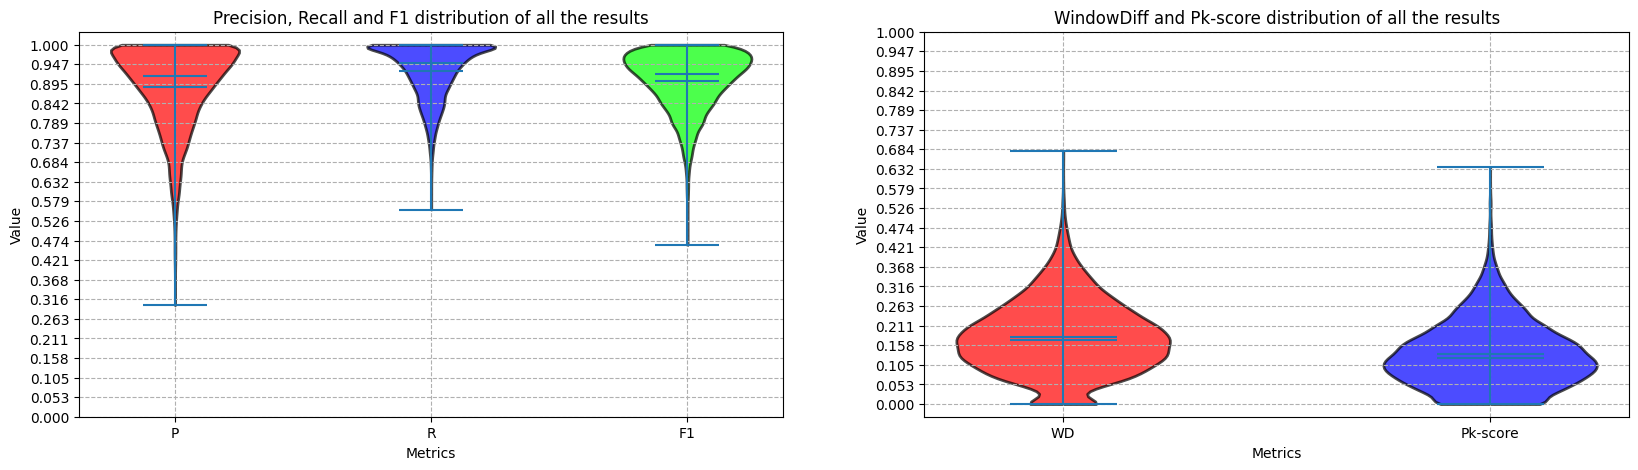

In [50]:
_, ax = plt.subplots(1, 2, figsize=(20, 5))
sub_vio_0 = ax[0].violinplot(all_result[:,:3], showmeans=True, showmedians=True)
ax[0].set_title(f'Precision, Recall and F1 distribution of all the results')
ax[0].set_xticks([1, 2, 3])
ax[0].set_xticklabels(['P', 'R', 'F1'])
ax[0].set_yticks(np.linspace(0, 1, 20))
ax[0].set_ylabel('Value')
ax[0].set_xlabel('Metrics')
ax[0].grid(linestyle='--',  which='both')
sub_vio_1 = ax[1].violinplot(all_result[:,3:], showmeans=True, showmedians=True)
ax[1].set_title(f'WindowDiff and Pk-score distribution of all the results')
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['WD', 'Pk-score'])
ax[1].set_yticks(np.linspace(0, 1, 20))
ax[1].set_ylabel('Value')
ax[1].set_xlabel('Metrics')
ax[1].grid(linestyle='--', which='both')
# Color formatting:
colors_3 = [[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0]]
colors_2 = [[1, 0, 0, 0], [0, 0, 1, 0]]
for vplot in (sub_vio_0, sub_vio_1):
    for patch, color in zip(vplot['bodies'], colors_3):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(0.7)
        patch.set_linewidth(2)
        patch.set_antialiased(True)
plt.show()

Then, box plots:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


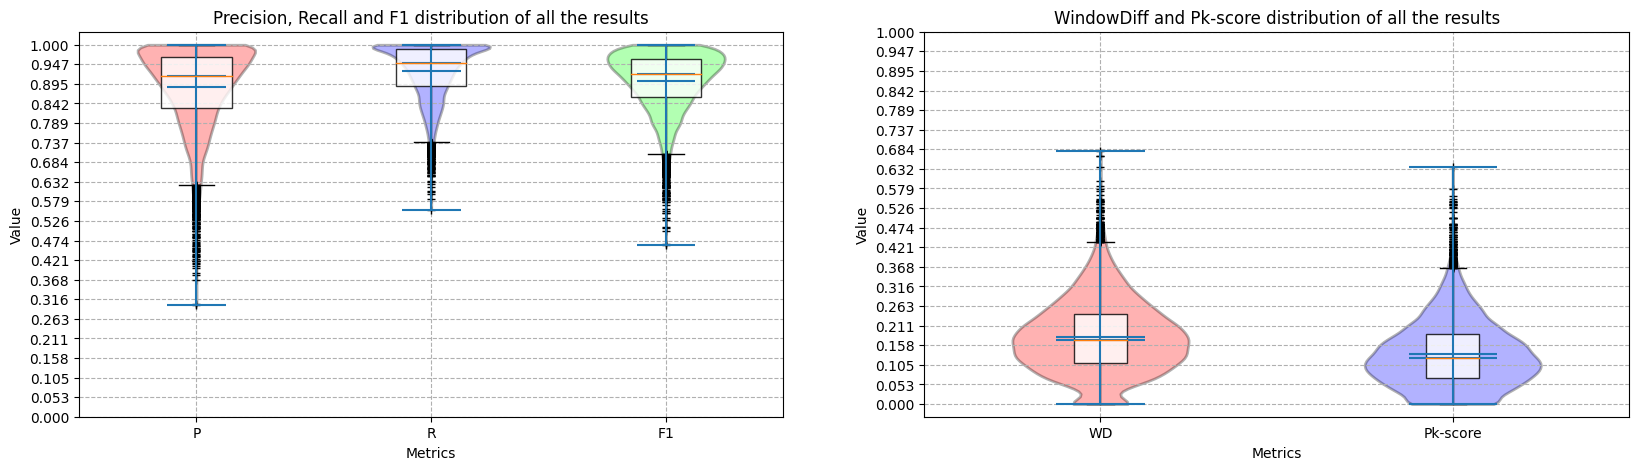

In [72]:
_, ax = plt.subplots(1, 2, figsize=(20, 5))
sub_box_0 = ax[0].boxplot(all_result[:,:3], patch_artist=True, sym='k+')
sub_vio_0 = ax[0].violinplot(all_result[:,:3], showmeans=True, showmedians=True)
ax[0].set_title(f'Precision, Recall and F1 distribution of all the results')
ax[0].set_xticks([1, 2, 3])
ax[0].set_xticklabels(['P', 'R', 'F1'])
ax[0].set_yticks(np.linspace(0, 1, 20))
ax[0].set_ylabel('Value')
ax[0].set_xlabel('Metrics')
ax[0].grid(linestyle='--',  which='both')
sub_box_1 = ax[1].boxplot(all_result[:,3:], patch_artist=True, sym='k+')
sub_vio_1 = ax[1].violinplot(all_result[:,3:], showmeans=True, showmedians=True)
ax[1].set_title(f'WindowDiff and Pk-score distribution of all the results')
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['WD', 'Pk-score'])
ax[1].set_yticks(np.linspace(0, 1, 20))
ax[1].set_ylabel('Value')
ax[1].set_xlabel('Metrics')
ax[1].grid(linestyle='--', which='both')
# Color formatting:
colors_3 = [[1, 0, 0, 0.9], [0, 0, 1, 0.9], [0, 1, 0, 0.9]]
colors_2 = [[1, 0, 0, 0.9], [0, 0, 1, 0.9]]
for bplot in (sub_box_0, sub_box_1):
    for patch, color in zip(bplot['boxes'], colors_3):
        patch.set_facecolor('white')
        patch.set_edgecolor('black')
        patch.set_antialiased(True)
        patch.set_alpha(0.8)
for vplot in (sub_vio_0, sub_vio_1):
    for patch, color in zip(vplot['bodies'], colors_3):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_alpha(0.3)
        patch.set_linewidth(2)
        patch.set_antialiased(True)
plt.savefig('violinplots.eps', format='eps')
plt.show()

Now, we will analyze the results in the database depending on the probability of detection and the probability of false alarm.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


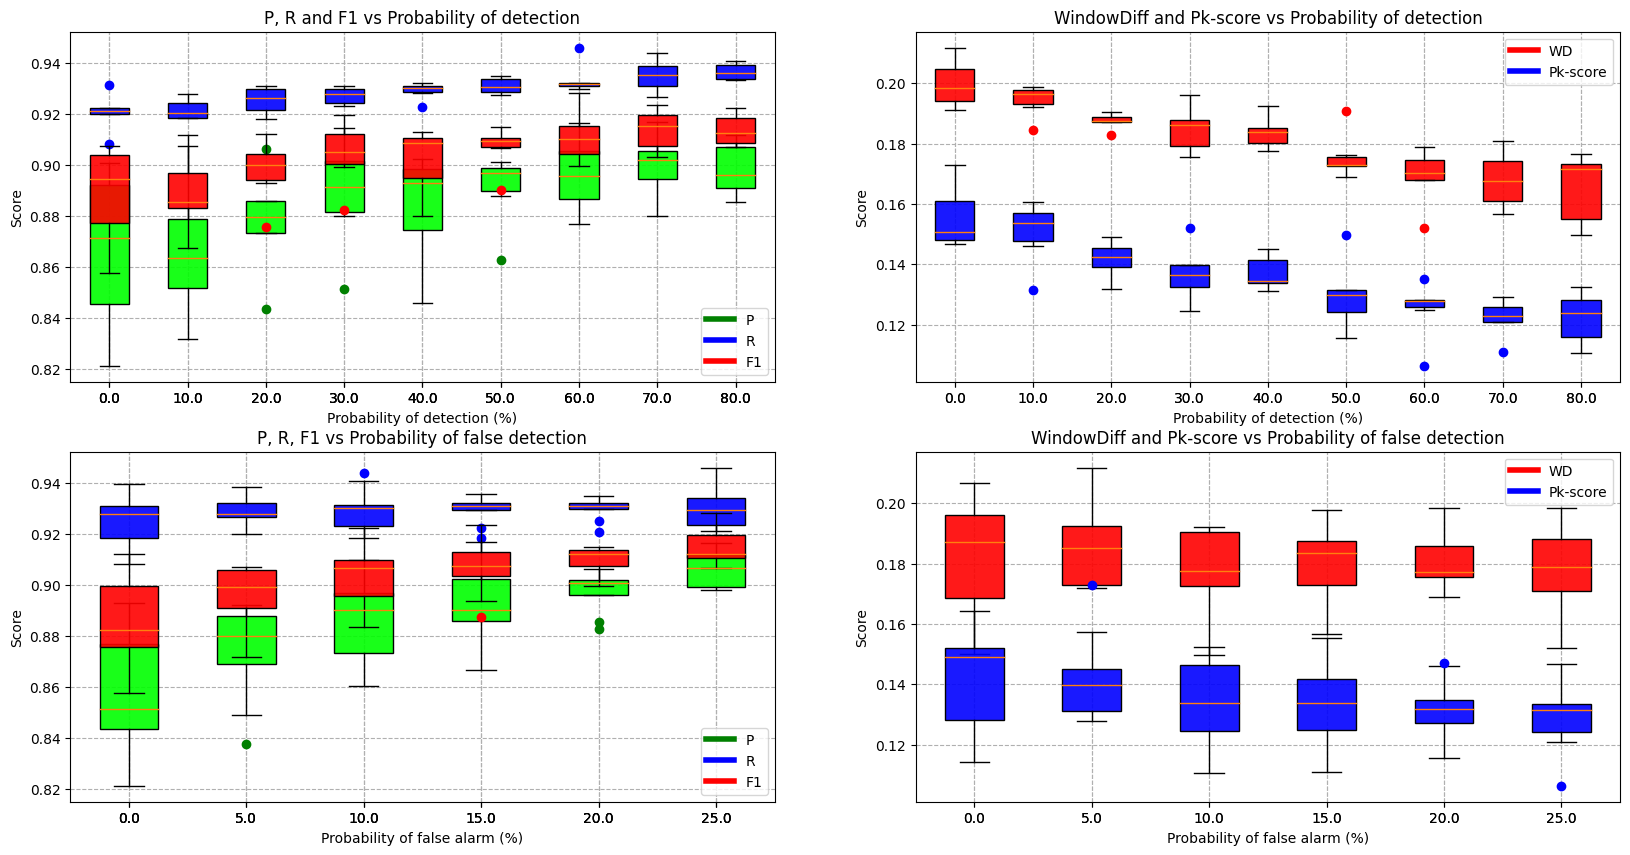

In [68]:
grouped_pd = means_df.groupby('p_d')
f1s_d = grouped_pd['F1'].apply(list)
rs_d = grouped_pd['Recall'].apply(list)
ps_d = grouped_pd['Precision'].apply(list)
wds_d = grouped_pd['WD'].apply(list)
pks_d = grouped_pd['Pk'].apply(list)
grouped_pfa = means_df.groupby('p_fa')
f1s_fa = grouped_pfa['F1'].apply(list)
rs_fa = grouped_pfa['Recall'].apply(list)
ps_fa = grouped_pfa['Precision'].apply(list)
wds_fa = grouped_pfa['WD'].apply(list)
pks_fa = grouped_pfa['Pk'].apply(list)

_, ax = plt.subplots(2, 2, figsize=(20, 10))
sub_00_1 = ax[0, 0].boxplot(rs_d, patch_artist=True, labels=np.linspace(0, 80, len(rs_d)), sym='bo')
sub_00_2 = ax[0, 0].boxplot(ps_d, patch_artist=True, labels=np.linspace(0, 80, len(ps_d)), sym='go')
sub_00_0 = ax[0, 0].boxplot(f1s_d, patch_artist=True, labels=np.linspace(0, 80, len(f1s_d)), sym='ro')
# sub_00_0['boxes'].set_facecolor('red')
# sub_00_1['boxes'].set_facecolor('blue')
# sub_00_2['boxes'].set_facecolor('green')
ax[0, 0].set_title(f'P, R and F1 vs Probability of detection')
ax[0, 0].set_xlabel('Probability of detection (%)')
ax[0, 0].set_ylabel('Score')
ax[0, 0].grid(linestyle='--',  which='both')
sub_10_1 = ax[1, 0].boxplot(rs_fa, patch_artist=True, labels=np.linspace(0, 25, len(rs_fa)), sym='bo')
sub_10_2 = ax[1, 0].boxplot(ps_fa, patch_artist=True, labels=np.linspace(0, 25, len(ps_fa)), sym='go')
sub_10_0 = ax[1, 0].boxplot(f1s_fa, patch_artist=True, labels=np.linspace(0, 25, len(f1s_fa)), sym='ro')
# sub_10_0['boxes'].set_facecolor('red')
# sub_10_1['boxes'].set_facecolor('blue')
# sub_10_2['boxes'].set_facecolor('green')
ax[1, 0].set_title(f'P, R, F1 vs Probability of false detection')
ax[1, 0].set_xlabel('Probability of false alarm (%)')
ax[1, 0].set_ylabel('Score')
ax[1, 0].grid(linestyle='--', which='both')
sub_01_0 = ax[0, 1].boxplot(wds_d, patch_artist=True, labels=np.linspace(0, 80, len(wds_d)), sym='ro')
sub_01_1 = ax[0, 1].boxplot(pks_d, patch_artist=True, labels=np.linspace(0, 80, len(pks_d)), sym='bo')
# sub_01_0['boxes'].set_facecolor('red')
# sub_01_1['boxes'].set_facecolor('blue')
ax[0, 1].set_title(f'WindowDiff and Pk-score vs Probability of detection')
ax[0, 1].set_xlabel('Probability of detection (%)')
ax[0, 1].set_ylabel('Score')
ax[0, 1].grid(linestyle='--',  which='both')
sub_11_0 = ax[1, 1].boxplot(wds_fa, patch_artist=True, labels=np.linspace(0, 25, len(wds_fa)), sym='ro')
sub_11_1 = ax[1, 1].boxplot(pks_fa, patch_artist=True, labels=np.linspace(0, 25, len(pks_fa)), sym='bo')
# sub_11_0['boxes'].set_facecolor('red')
# sub_11_1['boxes'].set_facecolor('blue')
ax[1, 1].set_title(f'WindowDiff and Pk-score vs Probability of false detection')
ax[1, 1].set_xlabel('Probability of false alarm (%)')
ax[1, 1].set_ylabel('Score')
ax[1, 1].grid(linestyle='--', which='both')
# Color formatting:
for bplot, color in zip((sub_00_0, sub_00_1, sub_00_2), colors_3):
    for patch in bplot['boxes']:
        patch.set_facecolor(color)
for bplot, color in zip((sub_10_0, sub_10_1, sub_10_2), colors_3):
    for patch in bplot['boxes']:
        patch.set_facecolor(color)
for bplot, color in zip((sub_01_0, sub_01_1), colors_2):
    for patch in bplot['boxes']:
        patch.set_facecolor(color)
for bplot, color in zip((sub_11_0, sub_11_1), colors_2):
    for patch in bplot['boxes']:
        patch.set_facecolor(color)

# Add legends.
custom_lines_3 = [plt.Line2D([0], [0], color='green', lw=4),
                  plt.Line2D([0], [0], color='blue', lw=4),
                  plt.Line2D([0], [0], color='red', lw=4)]
custom_lines_2 = [plt.Line2D([0], [0], color='red', lw=4),
                  plt.Line2D([0], [0], color='blue', lw=4)]
ax[0, 0].legend(custom_lines_3, ['P', 'R', 'F1'])
ax[1, 0].legend(custom_lines_3, ['P', 'R', 'F1'])
ax[0, 1].legend(custom_lines_2, ['WD', 'Pk-score'])
ax[1, 1].legend(custom_lines_2, ['WD', 'Pk-score'])
plt.savefig('boxplots.eps', format='eps')
plt.show()

All done, what is next?